In [1]:
# from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
spark = SparkSession.builder\
	.master("local[*]").appName("IDS_Analysis").getOrCreate()

24/08/27 16:04:26 WARN Utils: Your hostname, abraham resolves to a loopback address: 127.0.1.1; using 10.128.26.168 instead (on interface wlo1)
24/08/27 16:04:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


24/08/27 16:04:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/08/27 16:04:26 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [10]:
# load headers
data_desc = pd.read_csv("../data/raw/UNSW-NB15_features.csv", encoding='cp1252')

In [21]:
data_desc

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [17]:
list(data_desc.Name)

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [18]:
file_path = "/user/ids_analysis/UNSW-NB15.csv"
data = spark.read.csv(file_path, inferSchema=True)
data = data.toDF(
    'srcip',
    'sport',
    'dstip',
    'dsport',
    'proto',
    'state',
    'dur',
    'sbytes',
    'dbytes',
    'sttl',
    'dttl',
    'sloss',
    'dloss',
    'service',
    'Sload',
    'Dload',
    'Spkts',
    'Dpkts',
    'swin',
    'dwin',
    'stcpb',
    'dtcpb',
    'smeansz',
    'dmeansz',
    'trans_depth',
    'res_bdy_len',
    'Sjit',
    'Djit',
    'Stime',
    'Ltime',
    'Sintpkt',
    'Dintpkt',
    'tcprtt',
    'synack',
    'ackdat',
    'is_sm_ips_ports',
    'ct_state_ttl',
    'ct_flw_http_mthd',
    'is_ftp_login',
    'ct_ftp_cmd',
    'ct_srv_src',
    'ct_srv_dst',
    'ct_dst_ltm',
    'ct_src_ ltm',
    'ct_src_dport_ltm',
    'ct_dst_sport_ltm',
    'ct_dst_src_ltm',
    'attack_cat',
    'Label'
)

In [20]:
data.dtypes

[('srcip', 'string'),
 ('sport', 'int'),
 ('dstip', 'string'),
 ('dsport', 'int'),
 ('proto', 'string'),
 ('state', 'string'),
 ('dur', 'double'),
 ('sbytes', 'int'),
 ('dbytes', 'int'),
 ('sttl', 'int'),
 ('dttl', 'int'),
 ('sloss', 'int'),
 ('dloss', 'int'),
 ('service', 'string'),
 ('Sload', 'double'),
 ('Dload', 'double'),
 ('Spkts', 'int'),
 ('Dpkts', 'int'),
 ('swin', 'int'),
 ('dwin', 'int'),
 ('stcpb', 'bigint'),
 ('dtcpb', 'bigint'),
 ('smeansz', 'int'),
 ('dmeansz', 'int'),
 ('trans_depth', 'int'),
 ('res_bdy_len', 'int'),
 ('Sjit', 'double'),
 ('Djit', 'double'),
 ('Stime', 'int'),
 ('Ltime', 'int'),
 ('Sintpkt', 'double'),
 ('Dintpkt', 'double'),
 ('tcprtt', 'double'),
 ('synack', 'double'),
 ('ackdat', 'double'),
 ('is_sm_ips_ports', 'int'),
 ('ct_state_ttl', 'int'),
 ('ct_flw_http_mthd', 'int'),
 ('is_ftp_login', 'int'),
 ('ct_ftp_cmd', 'int'),
 ('ct_srv_src', 'int'),
 ('ct_srv_dst', 'int'),
 ('ct_dst_ltm', 'int'),
 ('ct_src_ ltm', 'int'),
 ('ct_src_dport_ltm', 'int'),
 (

In [23]:
data.show(10)

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Lab

In [2]:
# experimental plot
aggregate = pd.read_csv("../data/processed/aggregation_data.csv", sep="\t")

In [3]:
aggregate.columns = ["attack_cat", "avg_dur", "avg_sbytes", "avg_dbytes"]

In [4]:
aggregate

,attack_cat,avg_dur,avg_sbytes,avg_dbytes
0,,0.648492,4121.598472,41064.219525
1,Backdoor,2.612264,1803.989415,335.334819
2,Exploits,2.122902,29655.004065,17748.041909
3,Reconnaissance,1.005046,751.381283,1797.089226
4,Backdoors,0.921315,569.149813,160.700375
5,DoS,2.448795,18360.793799,21747.133737
6,Shellcode,0.362856,532.835208,146.399735
7,Analysis,1.416942,839.645125,296.184535
8,Fuzzers,2.673938,6764.302648,518.772127
9,Generic,0.053270,356.961983,1067.219439


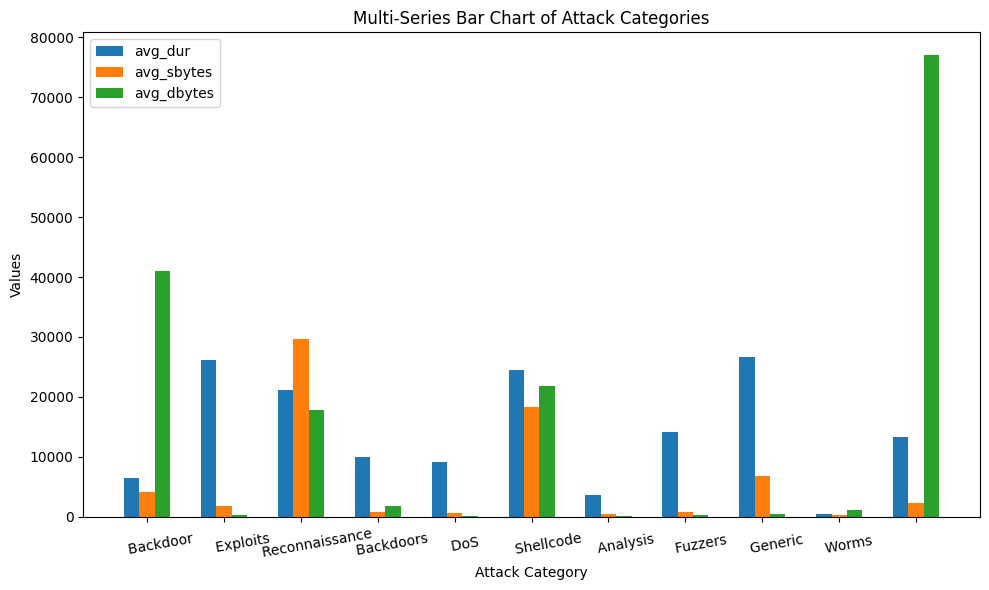

In [8]:
categories = aggregate["attack_cat"]
bar_width = 0.2
index = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10,6))

bar1 = ax.bar(index, aggregate["avg_dur"]*10000, bar_width, label="avg_dur")
bar2 = ax.bar(index + bar_width, aggregate["avg_sbytes"], bar_width, label="avg_sbytes")
bar1 = ax.bar(index + 2*bar_width, aggregate["avg_dbytes"], bar_width, label="avg_dbytes")

ax.set_xlabel('Attack Category')
ax.set_ylabel('Values')
ax.set_title('Multi-Series Bar Chart of Attack Categories')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(categories, rotation=10, ha='right')
ax.legend()

plt.tight_layout()
plt.show()